# Decision Tree 

##### Decision Tree, verileri karar kuralları (if–else mantığıyla) kullanarak sınıflandıran veya tahmin yapan bir denetimli öğrenme (supervised learning) algoritmasıdır.

Eğitim veri boyutu: (160, 11)
Test veri boyutu: (40, 11)
R² Skoru: 1.0
Ortalama Kare Hatası (MSE): 0.0


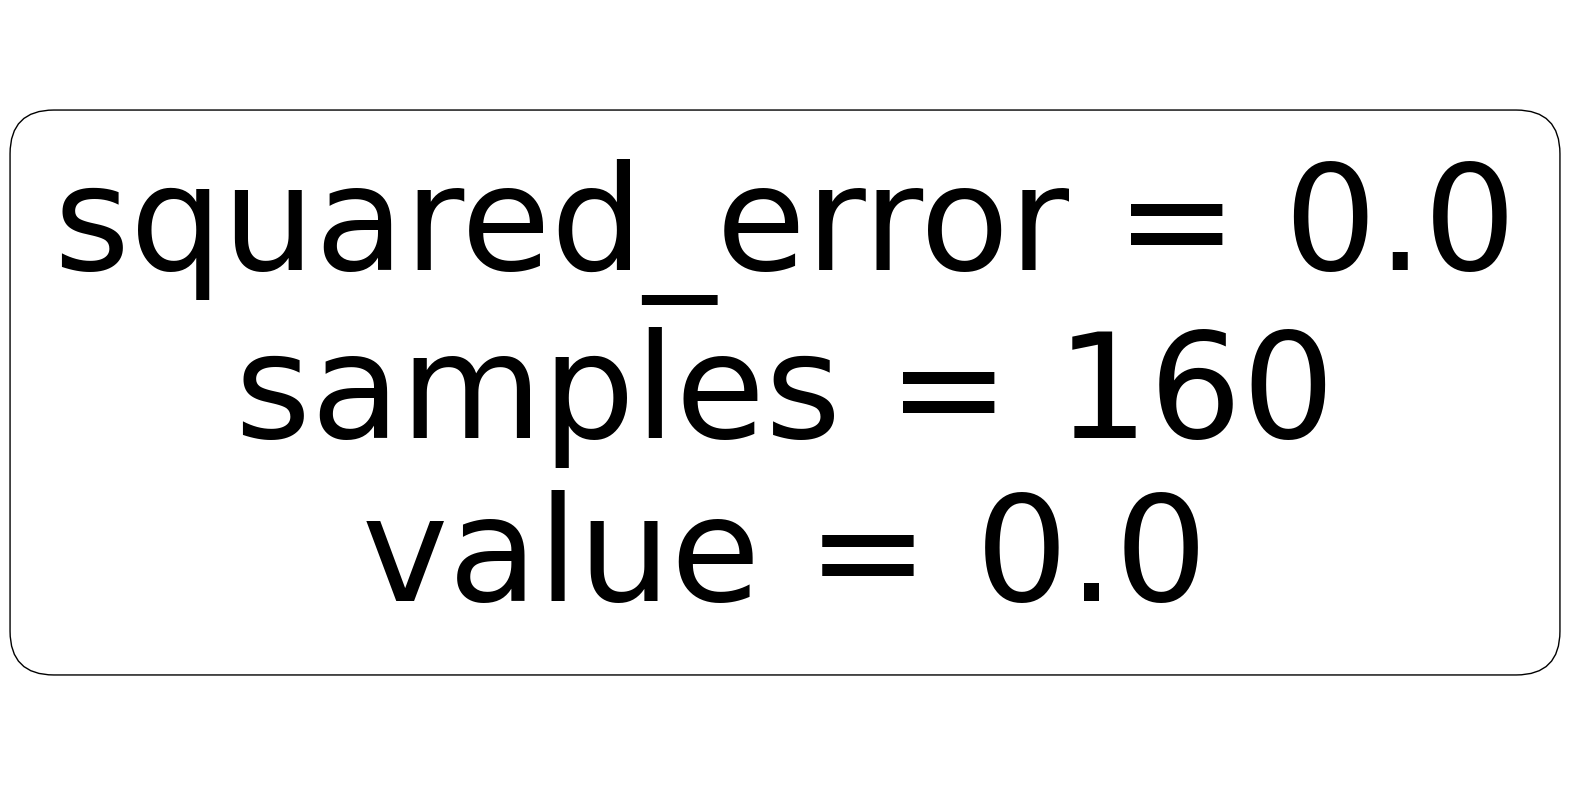

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('dava_sonuclari.csv')
data.head()


for col in data.columns[1:]:  
    if data[col].dtype in ['int64', 'float64']: 
        mean_value = data[col].mean()           
        data[col].fillna(int(mean_value))


from sklearn.model_selection import train_test_split


X = data.drop('Outcome', axis=1) 
y = data['Outcome']              


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("Eğitim veri boyutu:", X_train.shape)
print("Test veri boyutu:", X_test.shape)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder

for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Skoru:", r2)
print("Ortalama Kare Hatası (MSE):", mse)


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()